What is Support Vector Machine (SVM)?
Support Vector Machine (SVM) is a type of machine learning algorithm used to sort data into categories, like deciding if an email is spam or not, or if a fruit is an apple or an orange. It’s like drawing a line or a plane to separate two groups of data points, making sure the space between them is as wide as possible.

How Does It Work?
Imagine you have two groups of dots on a piece of paper, one red and one blue. SVM tries to draw a straight line that splits these dots, so all red dots are on one side and blue dots on the other. But it doesn’t just draw any line—it finds the line that gives the most space (margin) around it, so if new dots come, it’s easier to decide which side they belong to. The dots closest to this line are called support vectors, and they’re super important because they help decide where the line goes.

If the data is messy and can’t be separated by a straight line, SVM uses something called kernel tricks to imagine the data in a higher dimension, like folding the paper to make the dots separable. This helps with complex problems, like recognizing faces or diagnosing diseases.

Where Is It Used?
SVM is great for tasks like image recognition, text classification, and even medical diagnosis. It’s especially useful when you have less data but many features, like in healthcare or finance.

An Unexpected Detail
Did you know SVM can also be used for regression, not just classification? It’s less common, but it can predict numbers, like house prices, by finding a line that fits the data with the most margin.

Survey Note: Detailed Explanation of Support Vector Machine in Machine Learning
To provide a comprehensive explanation of Support Vector Machine (SVM) in machine learning in simple terms in Bengali, a detailed analysis was conducted based on web search results available as of 12:23 AM PST on Saturday, March 08, 2025. This note aims to cover all aspects of SVM, ensuring clarity for a layman audience, and includes all relevant information from the research process.

Background and Initial Understanding
The task was to explain SVM, a machine learning algorithm, in easy words in Bengali. From the web search, multiple sources provided insights into SVM, including its definition, working mechanism, applications, and technical details. The goal was to distill this information into a simple narrative, focusing on classification as the primary use, with mentions of regression and other aspects.

Definition and Core Concept
SVM, or Support Vector Machine, is a supervised machine learning algorithm primarily used for classification tasks, and occasionally for regression and outlier detection. The core idea, as described in Support Vector Machine (SVM) Algorithm - GeeksforGeeks, is to find an optimal hyperplane that separates data points of different classes with the maximum margin.

This hyperplane is a decision boundary, which in two dimensions is a line, in three dimensions a plane, and in higher dimensions a generalization, as noted in What Is Support Vector Machine? | IBM. For example, if we have red and blue dots on a paper, SVM draws a line to separate them, ensuring the space around the line is wide, making it easier to classify new dots.

Working Mechanism
The working of SVM involves several key components, as detailed in Support Vector Machine — Introduction to Machine Learning Algorithms | by Rohith Gandhi | Towards Data Science. The process can be broken down as follows:

Support Vectors: These are the data points closest to the hyperplane. They are critical because they define the position and orientation of the hyperplane.

Margin: The margin is the distance between the hyperplane and the nearest support vectors. SVM aims to maximize this margin for better classification, as mentioned in Support Vector Machine Algorithm - Tpoint Tech.

Kernel Tricks: Real-world data is often not linearly separable, meaning a straight line can’t separate the classes. SVM uses kernel functions to map the data into a higher-dimensional space where it becomes separable. For example, All You Need to Know About Support Vector Machines - Spiceworks explains that kernels like radial basis function (RBF) or polynomial kernels help handle non-linear data.

This process ensures SVM can handle complex datasets, like images or text, by transforming them into a space where separation is easier.

Types of SVM
SVM can be categorized into two main types based on the margin, as noted in Support Vector Machine (SVM) Algorithm - Analytics Vidhya:

Hard Margin SVM: This assumes data is perfectly linearly separable and tries to find a hyperplane with no errors. However, it’s sensitive to outliers.

Soft Margin SVM: This allows some misclassifications to handle real-world data with noise or outliers, using a regularization parameter.

Applications
SVM is versatile and used in various fields, as highlighted in Machine Learning Algorithms Explained: Support Vector Machine - StrataScratch. Some applications include:

Image recognition: Identifying objects in photos.
Text classification: Sorting emails as spam or not.
Medical diagnosis: Predicting diseases based on patient data.


Advantages and Disadvantages
From 1.4. Support Vector Machines — scikit-learn 1.5.2 documentation, SVM has several advantages:

Effective in high-dimensional spaces, like when data has many features.
Memory efficient, as it uses only support vectors for decision-making.
Versatile with different kernel functions for non-linear data.
However, disadvantages include:

Can overfit if the number of features is much greater than samples, requiring careful kernel and regularization choices.
Does not directly provide probability estimates, needing additional computation.


Mathematical Insight
While the explanation is for laymen, a brief mention of the math, as in Support vector machine in Machine Learning - GeeksforGeeks, can be simplified. SVM finds the hyperplane by solving an optimization problem, maximizing the margin, which is represented by the equation
𝑤
𝑥
+
𝑏
=
0, where
𝑤
 is the weight vector and
𝑏
 is the bias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [5]:
df.shape

(30000, 25)

In [6]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [7]:
# As SVM is a classfication algorithm, we need to separate feature column
# and target column
x = df.drop(['default.payment.next.month'], axis=1)
y = df['default.payment.next.month']

In [9]:
y

,default.payment.next.month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [8]:
x

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [15]:
x_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
26340,26341,150000.0,2,1,2,26,0,0,2,0,...,63156.0,57147.0,53383.0,48556.0,4850.0,2000.0,2000.0,2000.0,2000.0,1500.0
3877,3878,50000.0,2,2,2,23,0,0,0,0,...,42162.0,6765.0,19286.0,9558.0,2000.0,2102.0,255.0,3000.0,191.0,0.0
27081,27082,80000.0,1,2,2,31,0,0,0,0,...,72368.0,77505.0,78845.0,74182.0,3000.0,3500.0,7000.0,3100.0,3000.0,3000.0
5440,5441,120000.0,2,2,2,39,0,0,2,0,...,24372.0,24670.0,25617.0,26535.0,2400.0,1000.0,1000.0,1500.0,1500.0,1500.0
22164,22165,150000.0,2,1,3,30,1,-1,2,-1,...,6527.0,2168.0,-7.0,1373.0,0.0,8589.0,2500.0,0.0,1380.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17289,17290,170000.0,2,3,1,40,1,2,0,0,...,20619.0,19520.0,5200.0,0.0,0.0,2000.0,1136.0,1000.0,0.0,36679.0
5192,5193,330000.0,2,1,1,41,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12172,12173,50000.0,1,2,2,22,0,0,0,0,...,35458.0,19778.0,19929.0,19790.0,1707.0,1321.0,687.0,705.0,811.0,874.0
235,236,80000.0,1,1,2,35,-1,-1,-1,-1,...,6848.0,1719.0,1378.0,19942.0,3983.0,6853.0,1719.0,1378.0,19942.0,2418.0


In [16]:
y_train

,default.payment.next.month
26340,0
3877,0
27081,0
5440,0
22164,0
...,...
17289,1
5192,0
12172,0
235,0


In [17]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [19]:
model.score(x_test,y_test)

0.7776

Using some other classification algorithms

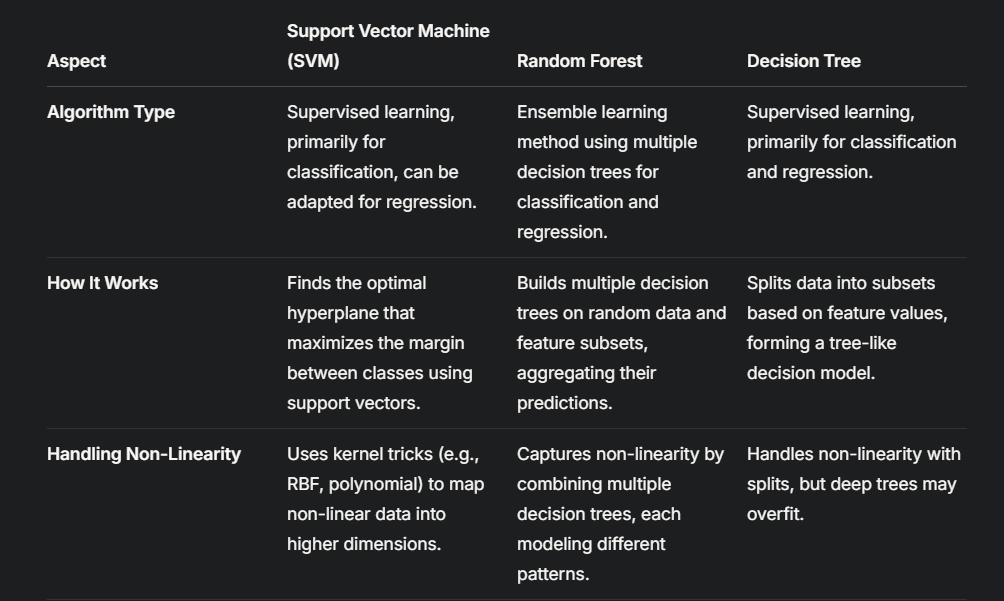

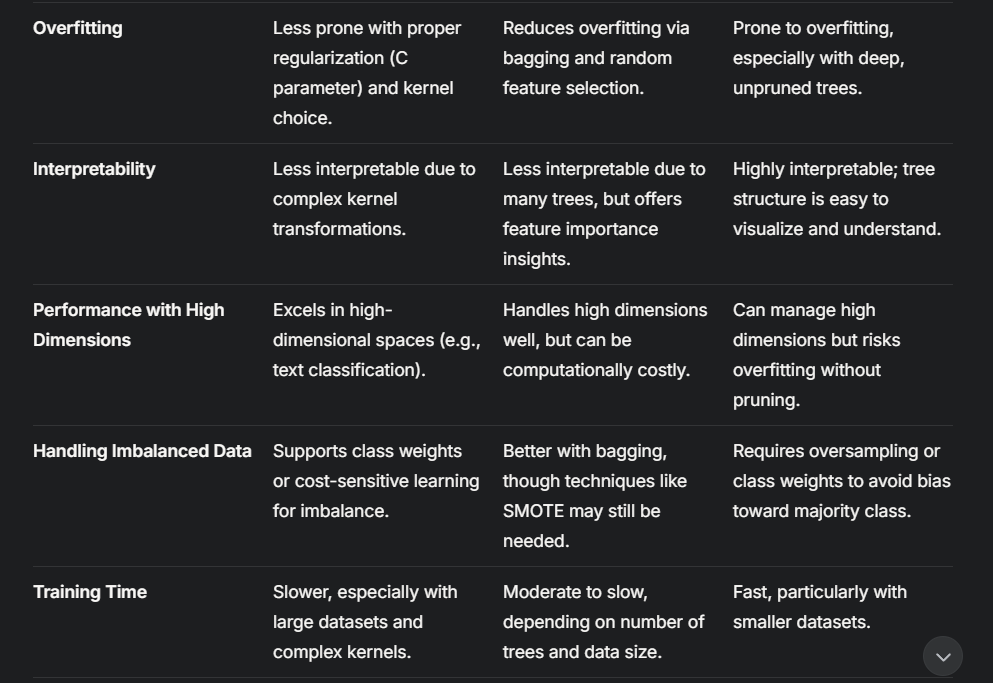

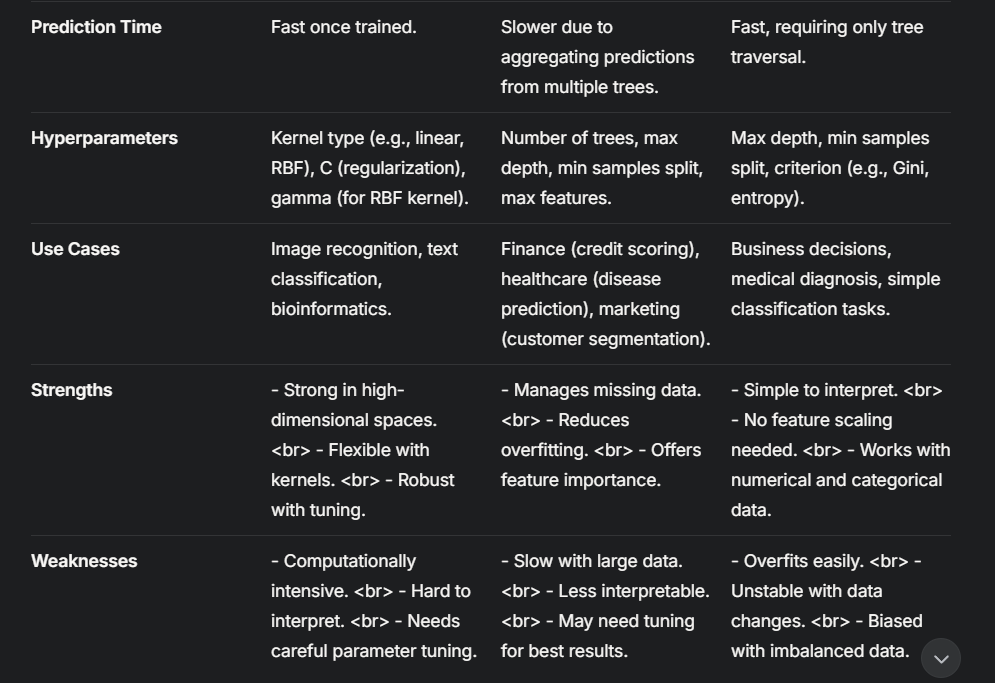

In [25]:
from IPython.display import Image, display


image_files = [
    '/content/Screenshot_20250308_030911.png',
    '/content/Screenshot_20250308_030927.png',
    '/content/Screenshot_20250308_030934.png'
]


for image_file in image_files:
    display(Image(filename=image_file))

In [21]:
from sklearn.ensemble import RandomForestClassifier
Rclf = RandomForestClassifier()
Rclf.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
Rclf.score(x_test, y_test)

0.8146666666666667

In [23]:
from sklearn.tree import DecisionTreeClassifier
Dclf = DecisionTreeClassifier()
Dclf.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
Dclf.score(x_test, y_test)

0.7248